In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

In [119]:
url = "https://raw.githubusercontent.com/J-win/ML_lab/master/AppleStore.csv"
dataRaw = pd.read_csv(url)
print(dataRaw)
print()

print(type(dataRaw))

      Unnamed: 0          id  \
0              1   281656475   
1              2   281796108   
2              3   281940292   
3              4   282614216   
4              5   282935706   
...          ...         ...   
7192       11081  1187617475   
7193       11082  1187682390   
7194       11087  1187779532   
7195       11089  1187838770   
7196       11097  1188375727   

                                             track_name  size_bytes currency  \
0                                       PAC-MAN Premium   100788224      USD   
1                             Evernote - stay organized   158578688      USD   
2       WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3     eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                                 Bible    92774400      USD   
...                                                 ...         ...      ...   
7192                                              Kubik

### __Описание и чтение__
Таблица содержит данные о 7197 приложений магазина iOS c идентификатор приложения, именем приложения, размером (в байтах), типом валют, ценой, подсчётом оценок пользователей (для всех версий), подсчётом оценок пользователей (для текущей версии), средним значение пользовательского рейтинга (для всех версий), средним значение пользовательского рейтинга (для текущей версии), кодом последней версии, рейтингом, основным жанр, количеством поддерживаемых устройств, количеством снимков экрана, отображаемых для отображения, количеством поддерживаемых языков, лицензированием на основе устройства Vpp.

Посмотрим на размеры таблицы - количество строк (каждая строка соответствует идентификатору и имени приложения) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [120]:
dataRaw.shape

(7197, 17)

In [121]:
dataRaw.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [123]:
dataRaw.tail()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1
7196,11097,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1


Удалим столбец Unnamed, потому что он не нужен

In [124]:
data = dataRaw.drop('Unnamed: 0', axis = 1)
print(data)

              id                                         track_name  \
0      281656475                                    PAC-MAN Premium   
1      281796108                          Evernote - stay organized   
2      281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3      282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4      282935706                                              Bible   
...          ...                                                ...   
7192  1187617475                                              Kubik   
7193  1187682390                                  VR Roller-Coaster   
7194  1187779532              Bret Michaels Emojis + Lyric Keyboard   
7195  1187838770          VR Roller Coaster World - Virtual Reality   
7196  1188375727                       Escape the Sweet Shop Series   

      size_bytes currency  price  rating_count_tot  rating_count_ver  \
0      100788224      USD   3.99             21292                26   
1  

In [125]:
data.shape

(7197, 16)

In [126]:
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [127]:
data.tail()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1
7196,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

Столбцы (признаки) имеют имена:
* "id": идентификатор приложения
* "track_name": имя приложения
* "size_bytes": размер (в байтах)
* "currency": тип валюты
* "price": цена
* "rating count tot": подсчет оценок пользователей (для всех версий)
* "rating count ver": подсчет оценок пользователей (для текущей версии)
* "user_rating": среднее значение пользовательского рейтинга (для всех версий)
* "user_rating_ver": среднее значение пользовательского рейтинга (для текущей версии).
* "ver": последняя версия
* "cont_rating": контент рейтинг
* "prime_genre": основной жанр
* "sup_devices.num": количество поддерживаемых устройств
* "ipadSc_urls.num": количество снимков экрана, отображаемых для отображения.
* "lang.num": количество поддерживаемых языков.
* "vpp_lic": лицензирование на основе устройства Vpp

Признаки track_name, currency, ver, cont_rating, prime_genre - номинальные (категориальные);
id, size_bytes, price, rating_count_tot, rating_count_ver, user_rating, user_rating_ver, sup_devices.num, ipadSc_urls.num, lang.num, vpp_lic - количественные (числовые)

Требуется классифицировать жанры приложений по остальным признакам.(Задача классификации)

### __Обработка категориальных признаков__
Столбцы 'track_name', 'currency', 'ver', 'cont_rating', 'prime_genre' содержат категориальные признаки. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [129]:
data['track_name'].dtype

dtype('O')

In [130]:
data['track_name'] = data['track_name'].astype('category')
data['track_name'].dtype

CategoricalDtype(categories=['! OH Fantastic Free Kick + Kick Wall Challenge',
                  '"Burn your fat with me!!"', '"HOOK"', '"klocki"',
                  '( OFFTIME ) light – Track how much you use your phone & Digital Detox and unplug to focus',
                  '*Solitaire*',
                  '-The 穴通し3D- 君の記憶力x反射神経を問う! ～Mr.CURVEからの挑戦状 ～',
                  '. Calculator .', '1 Second Everyday: Video Diary', '1+2=3',
                  ...
                  '麻雀物語３ 役満乱舞の究極大戦', '黄金日-贵金属理财投资黄金白银', '龙之觉醒-热血经典RPG，回味激燃岁月',
                  '龙珠直播-高清游戏娱乐直播平台', '실시간 날씨',
                  '애드픽 - 인플루언서가 되어 의미있는 수익을 올리세요!', '２ちゃんねる for iPhone',
                  'ＣＲスーパー海物語ＩＮ沖縄４', 'Ｘ:15秒の人気 アクション ゲーム', 'ｗｗｗ'],
                 ordered=False)

In [131]:
data['currency'].dtype

dtype('O')

In [132]:
data['currency'] = data['currency'].astype('category')
data['currency'].dtype

CategoricalDtype(categories=['USD'], ordered=False)

In [133]:
data['ver'].dtype

dtype('O')

In [134]:
data['ver'] = data['ver'].astype('category')
data['ver'].dtype

CategoricalDtype(categories=['0.0.15', '0.13', '0.14.87', '0.16.3', '0.17.518', '0.2',
                  '0.23.25', '0.3', '0.39', '0.4',
                  ...
                  '9999.1.3', '9999.1.6', '9999.1.8', 'Update 1.1', 'V3.7.0',
                  'iOV 2.1.3', 'v1.865', 'v2.13.9', 'v2.2.21', 'v3.6.9'],
                 ordered=False)

In [135]:
data['cont_rating'].dtype

dtype('O')

In [136]:
data['cont_rating'] = data['cont_rating'].astype('category')
data['cont_rating'].dtype

CategoricalDtype(categories=['12+', '17+', '4+', '9+'], ordered=False)

In [137]:
data['prime_genre'].dtype

dtype('O')

In [138]:
data['prime_genre'] = data['prime_genre'].astype('category')
data['prime_genre'].dtype

CategoricalDtype(categories=['Book', 'Business', 'Catalogs', 'Education', 'Entertainment',
                  'Finance', 'Food & Drink', 'Games', 'Health & Fitness',
                  'Lifestyle', 'Medical', 'Music', 'Navigation', 'News',
                  'Photo & Video', 'Productivity', 'Reference', 'Shopping',
                  'Social Networking', 'Sports', 'Travel', 'Utilities',
                  'Weather'],
                 ordered=False)

### __Обработка пропущенных значений__
Проверим на пропущенные значения

In [139]:
data.isna().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

Пропущенных значений нет

### __Визуализация данных__

In [140]:
print(data.shape)
print(data.columns)

(7197, 16)
Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')


In [141]:
data.index

RangeIndex(start=0, stop=7197, step=1)

In [142]:
data.describe(include='all')

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7197,7.197000e+03,7197,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197,7197,7197,7197.000000,7197.000000,7197.000000,7197.000000
unique,NaN,7195,NaN,1,NaN,NaN,NaN,NaN,NaN,1590,4,23,NaN,NaN,NaN,NaN
top,NaN,Mannequin Challenge,NaN,USD,NaN,NaN,NaN,NaN,NaN,1.0,4+,Games,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,7197,NaN,NaN,NaN,NaN,NaN,317,4433,3862,NaN,NaN,NaN,NaN
mean,8.631310e+08,NaN,1.991345e+08,NaN,1.726218,1.289291e+04,460.373906,3.526956,3.253578,NaN,NaN,NaN,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,NaN,3.592069e+08,NaN,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,NaN,NaN,NaN,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,NaN,5.898240e+05,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,NaN,4.692275e+07,NaN,0.000000,2.800000e+01,1.000000,3.500000,2.500000,NaN,NaN,NaN,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,NaN,9.715302e+07,NaN,0.000000,3.000000e+02,23.000000,4.000000,4.000000,NaN,NaN,NaN,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,NaN,1.819249e+08,NaN,1.990000,2.793000e+03,140.000000,4.500000,4.500000,NaN,NaN,NaN,38.000000,5.000000,8.000000,1.000000


In [143]:
data.describe(include=['category'])

,track_name,currency,ver,cont_rating,prime_genre
count,7197,7197,7197,7197,7197
unique,7195,1,1590,4,23
top,Mannequin Challenge,USD,1.0,4+,Games
freq,2,7197,317,4433,3862


Построим попарные матрицы разброса:

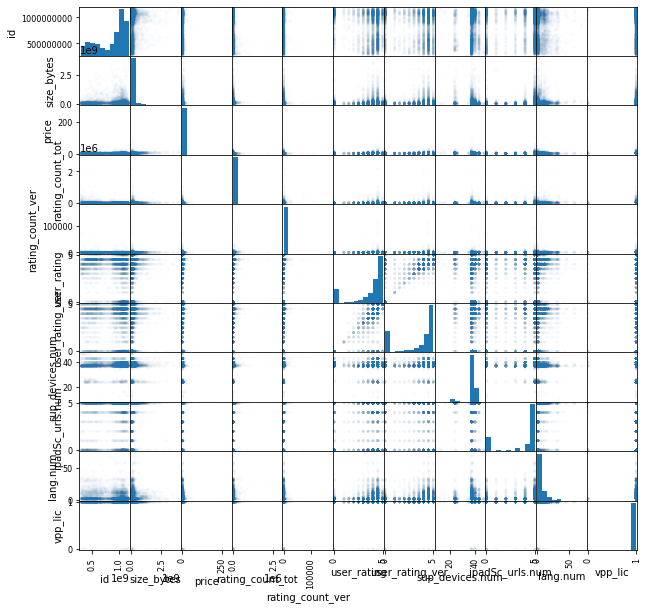

In [144]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Вычислим матрицу корреляции для количественных признаков. Используем визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.

In [145]:
data.corr()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849,0.033605,0.052082,-0.128932,0.017743
size_bytes,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices.num,0.033605,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.052082,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901
lang.num,-0.128932,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000,0.032477


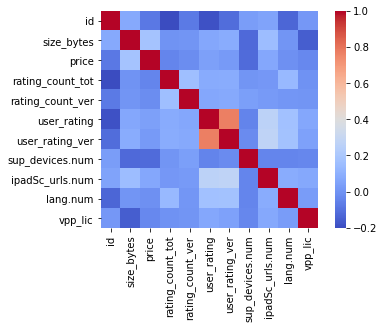

In [146]:
corrMat=data.corr()
sns.heatmap(corrMat, square=True, cmap='coolwarm')
pass

В основном корреляция не наблюдается, только у двух признаков: user_rating_ver и user_rating, что очевидно нам ничего не даёт

Выведем коэффициенты корреляции, большие заданного значения:

In [147]:
corrMat > 0.2

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,True,False,False,False,False,False,False,False,False,False,False
size_bytes,False,True,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,False
rating_count_tot,False,False,False,True,False,False,False,False,False,False,False
rating_count_ver,False,False,False,False,True,False,False,False,False,False,False
user_rating,False,False,False,False,False,True,True,False,True,False,False
user_rating_ver,False,False,False,False,False,True,True,False,True,False,False
sup_devices.num,False,False,False,False,False,False,False,True,False,False,False
ipadSc_urls.num,False,False,False,False,False,True,True,False,True,False,False
lang.num,False,False,False,False,False,False,False,False,False,True,False


Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели. Сильно коррелированные друг с другом переменные дают модели одну и ту же информацию, следовательно, для анализа не нужно использовать их все.

Построим диаграммы рассеивания для признаков prime_genre и price, user_rating_ver, size_bytes:

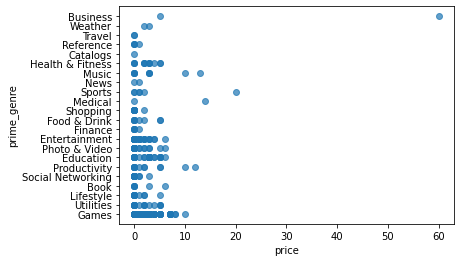

In [156]:
np.random.seed(42)
randomSubset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
plt.scatter(data.iloc[randomSubset]['price'], data.iloc[randomSubset]['prime_genre'], alpha=0.7)
plt.xlabel('price')
plt.ylabel('prime_genre')
pass

Как видно из диаграммы, больше всего стоят приложения для бизнеса.

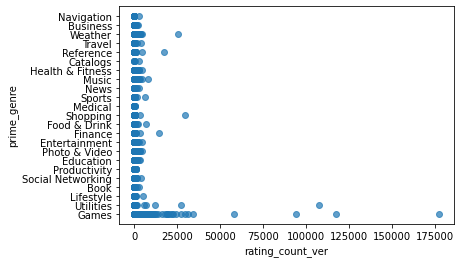

In [158]:
np.random.seed(42)
randomSubset = np.random.choice(np.arange(data.shape[0]), size=5000, replace=False)
plt.scatter(data.iloc[randomSubset]['rating_count_ver'], data.iloc[randomSubset]['prime_genre'], alpha=0.7)
plt.xlabel('rating_count_ver')
plt.ylabel('prime_genre')
pass

Как видно из диаграммы, больше всего ставят рейтинг играм.

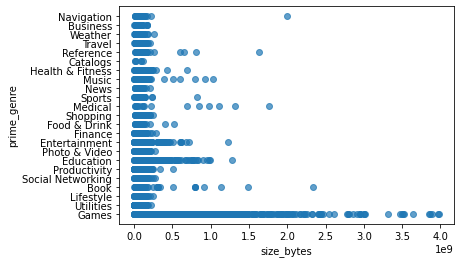

In [160]:
np.random.seed(42)
randomSubset = np.random.choice(np.arange(data.shape[0]), size=5000, replace=False)
plt.scatter(data.iloc[randomSubset]['size_bytes'], data.iloc[randomSubset]['prime_genre'], alpha=0.7)
plt.xlabel('size_bytes')
plt.ylabel('prime_genre')
pass

Как видно из диаграммы, больше всего весят игры.

### __Нормализация признаков__

In [161]:
X0 = data.drop('prime_genre', axis = 1)
y = data['prime_genre']
print("x:", X0.shape)
print("y:", y.shape)

x: (7197, 15)
y: (7197,)


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                7197 non-null   int64   
 1   track_name        7197 non-null   category
 2   size_bytes        7197 non-null   int64   
 3   currency          7197 non-null   category
 4   price             7197 non-null   float64 
 5   rating_count_tot  7197 non-null   int64   
 6   rating_count_ver  7197 non-null   int64   
 7   user_rating       7197 non-null   float64 
 8   user_rating_ver   7197 non-null   float64 
 9   ver               7197 non-null   category
 10  cont_rating       7197 non-null   category
 11  prime_genre       7197 non-null   category
 12  sup_devices.num   7197 non-null   int64   
 13  ipadSc_urls.num   7197 non-null   int64   
 14  lang.num          7197 non-null   int64   
 15  vpp_lic           7197 non-null   int64   
dtypes: category(5), float64(

In [175]:
X1 = X0.drop('id', axis = 1)
X2 = X1.drop('track_name', axis = 1)
X3 = X2.drop('currency', axis = 1)
X4 = X3.drop('ver', axis = 1)
X5 = X4.drop('cont_rating', axis = 1)
X6 = X5.drop('vpp_lic', axis = 1)
X = X6.drop('user_rating_ver', axis = 1)

Убрали данные столбцы, так как они не влияют на выборку, их не будем учитывать.

In [176]:
X

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,sup_devices.num,ipadSc_urls.num,lang.num
0,100788224,3.99,21292,26,4.0,38,5,10
1,158578688,0.00,161065,26,4.0,37,5,23
2,100524032,0.00,188583,2822,3.5,37,5,3
3,128512000,0.00,262241,649,4.0,37,5,9
4,92774400,0.00,985920,5320,4.5,37,5,45
...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,4.5,38,5,1
7193,120760320,0.00,30,30,4.5,38,0,1
7194,111322112,1.99,15,0,4.5,37,1,1
7195,97235968,0.00,85,32,4.5,38,0,2


In [177]:
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

In [178]:
X.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,sup_devices.num,ipadSc_urls.num,lang.num
count,7.197000e+03,7.197000e+03,7.197000e+03,7.197000e+03,7.197000e+03,7.197000e+03,7.197000e+03,7.197000e+03
mean,-1.441578e-17,1.071654e-14,-1.701829e-15,4.960003e-16,1.053317e-14,1.550841e-15,2.410990e-15,-4.960801e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.527305e-01,-2.959397e-01,-1.702272e-01,-1.174287e-01,-2.323503e+00,-7.588009e+00,-1.866612e+00,-6.862605e-01
25%,-4.237438e-01,-2.959397e-01,-1.698575e-01,-1.171736e-01,-1.775798e-02,-9.680176e-02,-3.560416e-01,-5.599914e-01
50%,-2.839072e-01,-2.959397e-01,-1.662662e-01,-1.115620e-01,3.116342e-01,-9.680176e-02,6.510054e-01,-5.599914e-01
75%,-4.790996e-02,4.522233e-02,-1.333508e-01,-8.171855e-02,6.410263e-01,1.707414e-01,6.510054e-01,3.238925e-01
max,1.065357e+01,5.113381e+01,3.910491e+01,4.504314e+01,9.704184e-01,2.578629e+00,6.510054e-01,8.783923e+00


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

5037 2160


In [180]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))
    i+=1

trees = 10 train accuracy = 0.9843160611475085 test accuracy = 0.5560185185185185
trees = 20 train accuracy = 0.9960293825689894 test accuracy = 0.5587962962962963
trees = 40 train accuracy = 0.9994044073853484 test accuracy = 0.5606481481481481
trees = 80 train accuracy = 1.0 test accuracy = 0.5648148148148148
trees = 160 train accuracy = 1.0 test accuracy = 0.5736111111111111


Метод RandomForest показывает самую высокую точность на обучаещей выборке для 80 и 160 деревьев - 100%. На тестовой самая высокая точность достигается при 160 деревьев - 57.3%.

In [181]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,10,20,30,40,50])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =', knn.score(X_test, y_test))
    i+=1

neighbours = 1 train accuracy = 1.0 test accuracy = 0.4898148148148148
neighbours = 10 train accuracy = 0.6108794917609688 test accuracy = 0.5541666666666667
neighbours = 20 train accuracy = 0.585666071074052 test accuracy = 0.5578703703703703
neighbours = 30 train accuracy = 0.5751439348818741 test accuracy = 0.5625
neighbours = 40 train accuracy = 0.5699821322215605 test accuracy = 0.5606481481481481
neighbours = 50 train accuracy = 0.5620408973595394 test accuracy = 0.5611111111111111


kNN метод показывает самую высокую точность на обучаещей выборке для 1 соседа - 100%. При увеличении количества соседей, точность на обучающей выборке падает, а на тестовой самая высокая точность достигается при 50 соседях - 56.1%, увеличивается с увеличением количества соседей

### __Выводы:__
Метод kNN показал чуть меньшую точность, чем Random_Forest.

### __Метод главных компонент (PCA)__
Применим метод для сокращения размерности пространства признаков,сократим размерность пространства до 2.

In [182]:
from sklearn.decomposition import PCA

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standart)
X_pca = pd.DataFrame(X_pca, columns=['1 компонента','2 компонента'])

In [183]:
X.shape, X_pca.shape

((7197, 8), (7197, 2))

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5037, 2), (5037,), (2160, 2), (2160,))

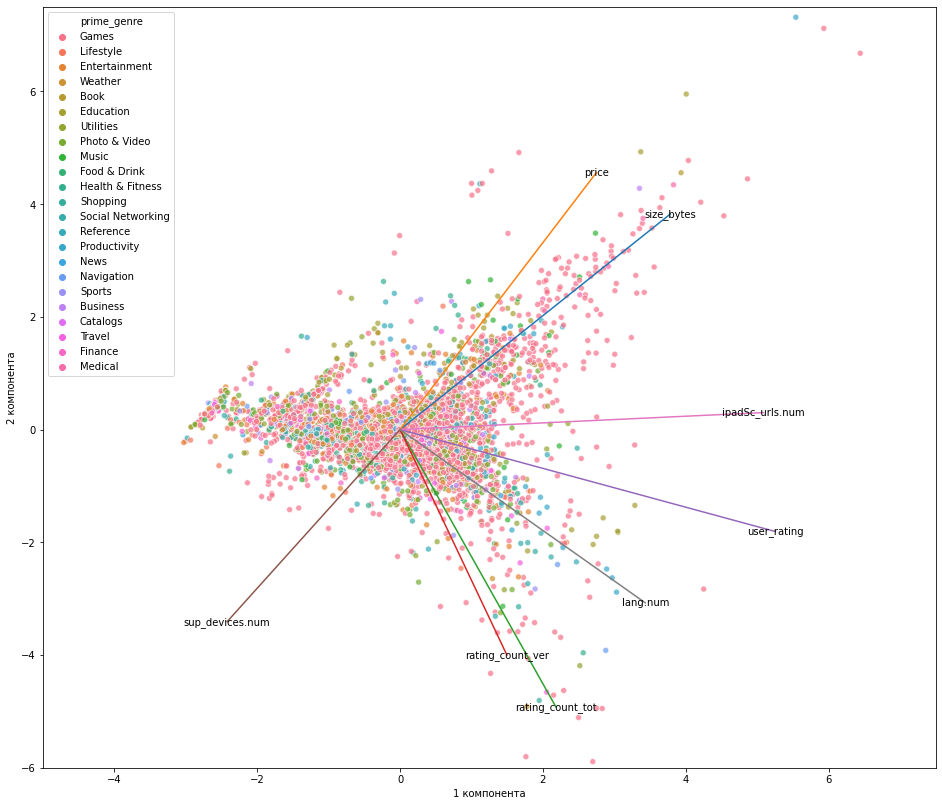

In [185]:
def biplot(Xx, y, coeff, labels):
    plt.figure(figsize=(16,14))
    draw = pd.concat([Xx, y], axis=1, join='inner')
    np.random.seed(10)
    random_subset = np.random.choice(np.arange(draw.shape[0]), size=5000, replace=False)
    sns.scatterplot(data=draw.iloc[random_subset], x='1 компонента', y='2 компонента', hue='prime_genre', alpha=0.7)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i]*10, coeff[1, i]*10, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i]*10], [0, coeff[1, i]*10])
    plt.ylim((-6,7.5))
    plt.xlim((-5,7.5))
    
    
biplot(X_pca, y, pca.components_, X.columns)

Как видно, наиболее важнымм признаками оказались:
* Пользовательский рейтинг
* Количество снимков экрана
* Размер приложения

### __Random Forest__
Применим классификатор Random Forest, так как он показывал более высокие результаты до применения PCA.

In [188]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))

trees = 10 train accuracy = 0.9646615048640064 test accuracy = 0.45601851851851855
trees = 20 train accuracy = 0.9898749255509232 test accuracy = 0.4726851851851852
trees = 40 train accuracy = 0.9986102838991463 test accuracy = 0.4722222222222222
trees = 80 train accuracy = 0.9998014691284495 test accuracy = 0.48055555555555557
trees = 160 train accuracy = 1.0 test accuracy = 0.4861111111111111


Точность на тренировочной и тестововй выборках сильно отличаются, это указывает на переобучение. Добавим параметр max_depth и посмотрим как изменятся результаты.

In [189]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i],max_depth=10)
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))

trees = 10 train accuracy = 0.6172324796505857 test accuracy = 0.5347222222222222
trees = 20 train accuracy = 0.6073059360730594 test accuracy = 0.5333333333333333
trees = 40 train accuracy = 0.6075044669446099 test accuracy = 0.538425925925926
trees = 80 train accuracy = 0.6055191582291046 test accuracy = 0.5393518518518519
trees = 160 train accuracy = 0.6017470716696446 test accuracy = 0.5402777777777777


Удалось повысить точность предсказания на тестовой выборке, за счет ограничения максимальной глубины дерева.

Видно, что применение PCA немного понижает точность предсказания, при использовнии двух компонент с 57.3% до 54%. Что в целом хорошо, так раз размерность пространства уменьшилась до 2.

### __PCA с различным числом компонент__
Построим графики, показывающие ошибку на тестовой и обучающей выборке при использовании разного количества компонент:

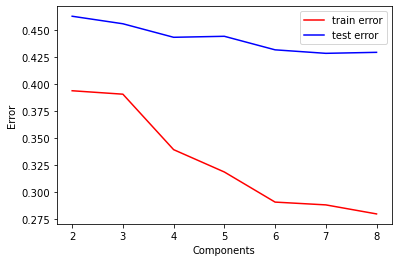

In [194]:
from sklearn.ensemble import RandomForestClassifier
test_error = []
train_error = []

pca_array = np.array([j+2 for j in range(7)])

for i in range(7):
    pca = PCA(n_components = pca_array[i])
    X_pca = pca.fit_transform(X_standart)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=5)
    
    rfc = RandomForestClassifier(n_estimators = 200, max_depth=10)
    rfc.fit(X_train, y_train)
    
    test_error.append(1 - rfc.score(X_test, y_test))
    train_error.append(1 - rfc.score(X_train, y_train))

plt.plot(range(2,9), train_error, label="train error", color='red')
plt.plot(range(2,9), test_error, label="test error", color='blue')
plt.xlabel("Components")
plt.ylabel("Error")
plt.legend()
pass

Видно,что ошибка на тестовой и тренировочной выборках, при увеличении числа используемых компонент,уменьшается.

### __LDA__

In [195]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X_standart, y)
X_lda = pd.DataFrame(X_lda,columns = ['1 компонента','2 компонента'])

In [196]:
X.shape, X_lda.shape

((7197, 8), (7197, 2))

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.3, random_state = 5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5037, 2), (5037,), (2160, 2), (2160,))

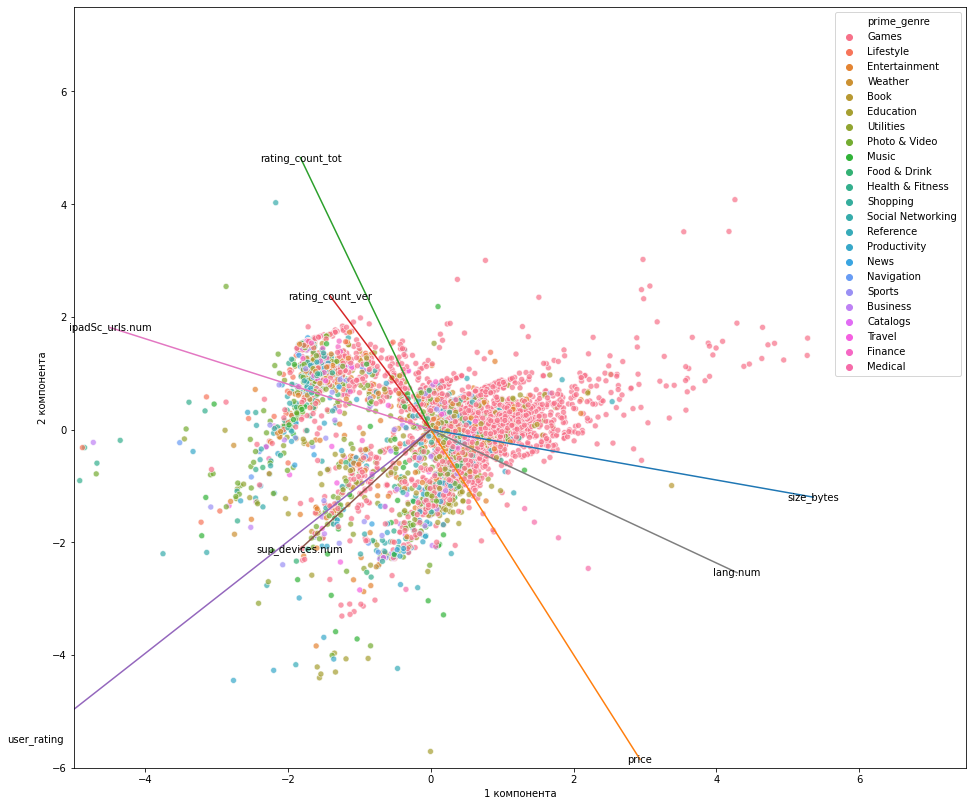

In [199]:
biplot(X_lda, y, lda.scalings_, X.columns)

Самым важным признаком, при использовании LDA оказался пользовательский рейтинг.

### __Random Forest__

In [201]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i], max_depth=10)
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))

trees = 10 train accuracy = 0.6263648997419099 test accuracy = 0.5462962962962963
trees = 20 train accuracy = 0.6418503077228509 test accuracy = 0.549074074074074
trees = 40 train accuracy = 0.6438356164383562 test accuracy = 0.5509259259259259
trees = 80 train accuracy = 0.6456223942823109 test accuracy = 0.55
trees = 160 train accuracy = 0.6454238634107604 test accuracy = 0.5541666666666667


Точность для Random Forest упала с 57.3% до 55.4%. Но немного лучше, чем с PCA.

### __Выводы:__
LDA и PCA немного понизили точность предсказания, что делает эти методы хорошим решением для этой задачи.